In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

!pip install -q stockstats

from stockstats import StockDataFrame as Sdf
#stockstats module is used to easily compute technical indicators in a pandas dataframe.

np.random.seed(42)

This is a study to determine one of the most underlying questions in investing: What is the most significant technical indicator?

This study will use linear regression's coeficients to determine what the most important indicators are.

In [0]:
data = pd.read_csv("TSLA.csv")

stock = Sdf.retype(data)

In [5]:
data['CR'] = stock['cr']
data['kdjk'] = stock['kdjk']
data['kdjd'] = stock['kdjd']
data['kdjj'] = stock['kdjj']
data['open_10_sma'] = stock['open_10_sma']
data['macd'] = stock['macd']
data['boll'] = stock['boll']
data['rsi'] = stock['rsi_10']
data['wr'] = stock['wr_10']
data['cci'] = stock['cci_10']
data['tr'] = stock['tr']
data['dma'] = stock['dma']
data['pdi'] = stock['pdi']
data['mdi'] = stock['mdi']
data['dx'] = stock['dx']
data['vr'] = stock['vr']
data['vr_10_sma'] = stock['vr_10_sma']
data['trix'] = stock['trix']
data['adx'] = stock['adx']
data['adxr'] = stock['adxr']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
data.tail()

,open,high,low,close,adj close,volume,middle,cr,cr-ma1,cr-ma2,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,change,vr,vr_10_sma,trix
date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,313.500000,314.500000,295.200012,295.390015,295.390015,5559900,301.696676,79.382477,118.858918,136.648366,...,65.224403,65.224403,49.015813,49.015813,40.755939,40.755939,-7.624222,85.402152,111.692423,-0.008333
2018-12-26,300.000000,326.970001,294.089996,326.089996,326.089996,8163100,315.716664,86.532127,107.974560,130.574856,...,35.229068,35.229068,45.076743,45.076743,41.990454,41.990454,10.393033,89.064140,107.136174,-0.105924
2018-12-27,319.839996,322.170013,301.500000,316.130005,316.130005,8575100,313.266673,79.943703,98.801134,125.887982,...,35.229068,35.229068,42.263121,42.263121,42.068359,42.068359,-3.054369,74.950676,103.008607,-0.191961
2018-12-28,323.100006,336.239990,318.410004,333.869995,333.869995,9939000,329.506663,83.211805,91.990487,122.711916,...,6.252790,6.252790,31.974455,31.974455,39.184386,39.184386,5.611612,92.984581,98.377510,-0.246501
2018-12-31,337.790009,339.209991,325.260010,332.799988,332.799988,6297400,332.423330,94.998059,89.980587,117.129702,...,0.982555,0.982555,23.119627,23.119627,34.594455,34.594455,-0.320486,94.677820,93.832248,-0.278793


In [7]:
data.isnull().any()

open             False
high             False
low              False
close            False
adj close        False
volume           False
middle           False
cr                True
cr-ma1            True
cr-ma2            True
cr-ma3            True
CR                True
rsv_9            False
kdjk_9           False
kdjk             False
kdjd_9           False
kdjd             False
kdjj_9           False
kdjj             False
open_10_sma      False
close_26_ema     False
macd             False
macds            False
macdh            False
close_20_sma     False
close_20_mstd     True
boll             False
boll_ub           True
boll_lb           True
close_-1_s        True
                 ...  
cci               True
tr                True
close_10_sma     False
close_50_sma     False
dma              False
high_delta        True
um                True
low_delta         True
dm                True
pdm              False
pdm_14_ema       False
pdm_14           False
atr_14     

In [8]:
data.isnull().sum() / len(data)

open             0.000000
high             0.000000
low              0.000000
close            0.000000
adj close        0.000000
volume           0.000000
middle           0.000000
cr               0.000467
cr-ma1           0.002334
cr-ma2           0.003268
cr-ma3           0.005135
CR               0.000467
rsv_9            0.000000
kdjk_9           0.000000
kdjk             0.000000
kdjd_9           0.000000
kdjd             0.000000
kdjj_9           0.000000
kdjj             0.000000
open_10_sma      0.000000
close_26_ema     0.000000
macd             0.000000
macds            0.000000
macdh            0.000000
close_20_sma     0.000000
close_20_mstd    0.000467
boll             0.000000
boll_ub          0.000467
boll_lb          0.000467
close_-1_s       0.000467
                   ...   
cci              0.000467
tr               0.000467
close_10_sma     0.000000
close_50_sma     0.000000
dma              0.000000
high_delta       0.000467
um               0.000467
low_delta   

In [0]:
data.dropna(inplace=True)

In [0]:
rf = LinearRegression()

In [0]:
X = data.drop(['open', 'high', 'low', 'close', 'adj close', 'volume', 'middle', 'close_-1_s'], axis=1).shift(10).dropna()
y = (data['adj close'] > data['adj close'].shift(10)).dropna()

trainX, testX, trainY, testY = train_test_split(X.values, y[10:].values, test_size=.2)

In [12]:
rf.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
mean_squared_error(testY, rf.predict(testX))

0.24789014053342245

In [14]:
for i in range(len(X.keys())):
  print(X.keys()[i], rf.coef_[i] * 100)

cr 0.14508524548360668
cr-ma1 -0.02975747864829481
cr-ma2 -0.09557174953297551
cr-ma3 0.0166270564570296
CR 0.1449849117182015
rsv_9 -0.292539027318734
kdjk_9 -55890071782.43655
kdjk -56792981265.08198
kdjd_9 37846309836.471756
kdjd 37275725528.49181
kdjj_9 18306171356.68829
kdjj 19254846325.4172
open_10_sma -3.7527747602435975
close_26_ema 3.111803857882563
macd -952892890.6710135
macds 952892891.2142687
macdh 476446448.25848806
close_20_sma -277210369818.4305
close_20_mstd -135096513784.62155
boll -277437268145.1052
boll_ub 311097947428.4826
boll_lb 243549690535.09146
close_-1_d 0.02475564411012522
rs_10 -4.711840672774301
rsi_10 257390114.95452872
rsi -257390112.85543567
wr_10 305928909.04424226
wr -305928909.32318175
middle_10_sma 20.157168356980122
cci_10 2853650631.3428226
cci -2853650631.296642
tr 0.0787969153166368
close_10_sma 131815466322.08664
close_50_sma -131815466341.66502
dma -131815466341.28279
high_delta -0.1919180154800415
um 5.387568473815918
low_delta -0.07524490356

<Container object of 60 artists>

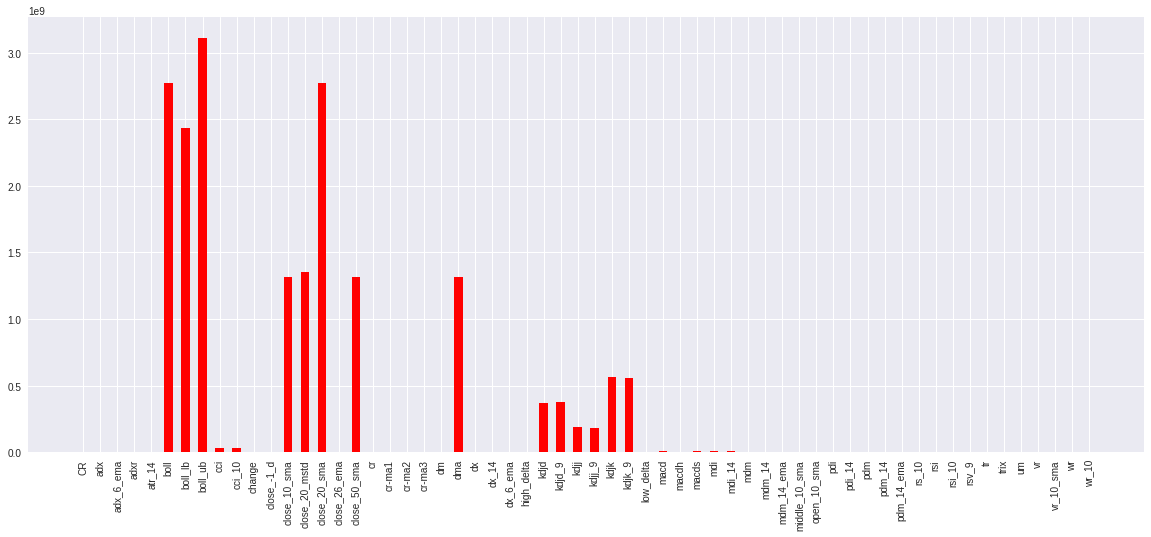

In [16]:
plt.xticks(rotation=90, fontsize=10)
plt.rcParams["figure.figsize"] = (20,8)
plt.bar([a for a in X.keys()], abs(rf.coef_), width=.5, color='red')

Conclusion: Bollinger bands, and Moving Averages are the most important indicators of the closing price.